In [1]:
cd /mnt/d/ArchivosLaptop/Universidad/ProgConcurrente/Proyecto/

[Errno 2] No such file or directory: '/mnt/d/ArchivosLaptop/Universidad/ProgConcurrente/Proyecto/'
/content


In [ ]:
!echo "HOSTNAME     " `hostname`;
!echo "CURRENT DIR  " `pwd`

HOSTNAME      LAPTOP-LD


CURRENT DIR   /mnt/d/ArchivosLaptop/Universidad/ProgConcurrente/Proyecto


In [3]:
pip install biopython tqdm numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.0 MB/s eta 0:00:00


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from Bio import SeqIO

# Función para leer y combinar todas las secuencias de un archivo FASTA
def merge_sequences_from_fasta(file_path):
    sequences = []  # Lista para almacenar todas las secuencias
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
    return "".join(sequences)

In [5]:
# Definir las rutas de los archivos
file_path_1 = "E_coli.fna"
file_path_2 = "Salmonella.fna"

# Leer y combinar las secuencias
merged_sequence_1 = merge_sequences_from_fasta(file_path_1)
merged_sequence_2 = merge_sequences_from_fasta(file_path_2)

# Usar solo las primeras 1000 bases de cada secuencia para el dotplot
Secuencia1 = merged_sequence_1[:100000]
Secuencia2 = merged_sequence_2[:100000]

In [6]:
# Crear la matriz de dotplot
begin = time.time()
dotplot = np.zeros((len(Secuencia1), len(Secuencia2)), dtype=np.uint8)
print("La matriz de resultado tiene tamaño: ", dotplot.shape)

# Llenar la matriz de dotplot
for i in tqdm(range(dotplot.shape[0])):
    for j in (range(dotplot.shape[1])):
        if Secuencia1[i] == Secuencia2[j]:
            dotplot[i, j] = 1
        else:
            dotplot[i, j] = 0

print(f"\nEl código se ejecutó en: {time.time() - begin} segundos")

La matriz de resultado tiene tamaño:  (100000, 100000)


100%|██████████| 100000/100000 [1:10:25<00:00, 23.67it/s]


El código se ejecutó en: 4225.233859539032 segundos


In [7]:
# Función para dibujar el dotplot
def draw_dotplot(matrix, fig_name='dotplot.svg'):
    plt.figure(figsize=(5, 5))
    plt.imshow(matrix, cmap='Greys', aspect='auto')
    plt.ylabel("Secuencia 1")
    plt.xlabel("Secuencia 2")
    plt.savefig(fig_name)

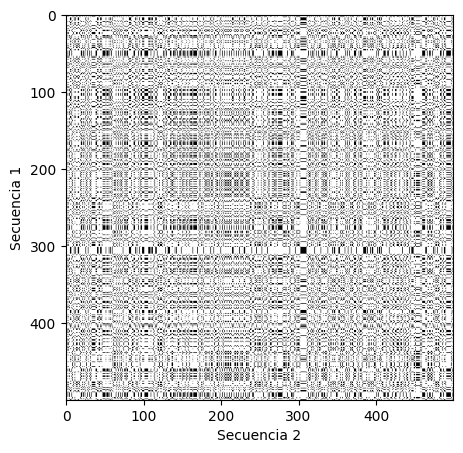

In [11]:
# Dibujar y guardar el dotplot
draw_dotplot(dotplot[:500, :500])